# 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import EarlyStopping, TensorBoard

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Loading Data

In [2]:
df = pd.read_csv('D:\\Thesis\\Working Directory\\MT10_Scaled_Lasso.csv')
df1 = pd.read_csv('D:\\Thesis\\Working Directory\\MT10.csv')

# 3. Data Exploaration

In [3]:
df.isna().sum()

COUNTY                          0
NAME                            0
lon                             0
lat                             0
POP_ESTIMATE_2019               0
                               ..
percent_smokers                 0
percent_physically_inactive     0
percent_adults_with_diabetes    0
percent_insufficient_sleep      0
Mortality_Rate                  0
Length: 484, dtype: int64

In [4]:
df.columns.get_loc("R_INTERNATIONAL_MIG_2018")

466

In [5]:
df = df.iloc[:,466:]

In [6]:
df.head()

,R_INTERNATIONAL_MIG_2018,Median_Household_Income_2018,Density_per_square_mile_of_land_area_Population,Active_Physicians_per_100000_Population_2018_AAMC,Total_nurse_practitioners_2019,Mean_Annual_Precipitation,Annual_Mean_Range_Temp,Cardiovascular_diseases_Mortality_Rate_2014,Hypertensive_heart_disease_Mortality_Rate_2014,Leukemia_Mortality_Rate_2014,Chronic_respiratory_diseases_Mortality_Rate_2014,Asthma_Mortality_Rate_2014,percent_fair_or_poor_health,percent_smokers,percent_physically_inactive,percent_adults_with_diabetes,percent_insufficient_sleep,Mortality_Rate
0,-0.493836,0.473687,-0.095624,-0.9176,-0.153843,0.200268,0.795795,0.653028,-0.008285,0.655147,1.066666,-0.476512,0.624812,0.173165,1.284879,-0.252219,0.692690,191.519447
1,-0.273426,0.347347,-0.082354,-0.9176,0.393965,0.691463,-0.154841,-0.099986,0.104523,-0.344122,-0.566312,-0.808072,-0.089572,0.007013,-0.155557,-0.350800,0.066570,136.627933
2,-0.273426,-1.327983,-0.131010,-0.9176,-0.257455,0.012676,0.375264,-0.387973,0.030172,0.894102,0.356133,0.951746,2.468828,1.271944,-0.682545,1.349726,1.332833,226.849226
3,-0.317508,-0.484615,-0.127635,-0.9176,-0.265822,0.495849,0.561838,1.701845,0.339112,1.437183,1.226936,0.135599,0.319214,0.462732,1.074083,0.585721,1.233045,276.859873
4,-0.449754,-0.170716,-0.097311,-0.9176,-0.146292,1.246217,-0.465797,0.509289,-0.519766,0.655147,1.378896,-0.425503,0.807398,0.489223,0.511962,1.201854,0.702229,231.729672


In [7]:
df.columns

Index(['R_INTERNATIONAL_MIG_2018', 'Median_Household_Income_2018',
       'Density_per_square_mile_of_land_area_Population',
       'Active_Physicians_per_100000_Population_2018_AAMC',
       'Total_nurse_practitioners_2019', 'Mean_Annual_Precipitation',
       'Annual_Mean_Range_Temp', 'Cardiovascular_diseases_Mortality_Rate_2014',
       'Hypertensive_heart_disease_Mortality_Rate_2014',
       'Leukemia_Mortality_Rate_2014',
       'Chronic_respiratory_diseases_Mortality_Rate_2014',
       'Asthma_Mortality_Rate_2014', 'percent_fair_or_poor_health',
       'percent_smokers', 'percent_physically_inactive',
       'percent_adults_with_diabetes', 'percent_insufficient_sleep',
       'Mortality_Rate'],
      dtype='object')

## 3.1 Summary Statistics

In [8]:
pd.options.display.float_format = '{:.3f}'.format  # Suppressing scientific notation to be 3 digits
df1[['R_INTERNATIONAL_MIG_2018', 'Median_Household_Income_2018',
       'Density_per_square_mile_of_land_area_Population',
       'Active_Physicians_per_100000_Population_2018_AAMC',
       'Total_nurse_practitioners_2019', 'Mean_Annual_Precipitation',
       'Annual_Mean_Range_Temp', 'Cardiovascular_diseases_Mortality_Rate_2014',
       'Hypertensive_heart_disease_Mortality_Rate_2014',
       'Leukemia_Mortality_Rate_2014',
       'Chronic_respiratory_diseases_Mortality_Rate_2014',
       'Asthma_Mortality_Rate_2014', 'percent_fair_or_poor_health',
       'percent_smokers', 'percent_physically_inactive',
       'percent_adults_with_diabetes', 'percent_insufficient_sleep',
       'Mortality_Rate']].describe()

,R_INTERNATIONAL_MIG_2018,Median_Household_Income_2018,Density_per_square_mile_of_land_area_Population,Active_Physicians_per_100000_Population_2018_AAMC,Total_nurse_practitioners_2019,Mean_Annual_Precipitation,Annual_Mean_Range_Temp,Cardiovascular_diseases_Mortality_Rate_2014,Hypertensive_heart_disease_Mortality_Rate_2014,Leukemia_Mortality_Rate_2014,Chronic_respiratory_diseases_Mortality_Rate_2014,Asthma_Mortality_Rate_2014,percent_fair_or_poor_health,percent_smokers,percent_physically_inactive,percent_adults_with_diabetes,percent_insufficient_sleep,Mortality_Rate
count,3140.000,3139.000,3140.000,3140.000,3140.000,3134.000,3134.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000
mean,1.123,52807.538,259.281,254.935,52.696,3.699,21.455,277.804,10.183,9.532,63.750,1.258,17.926,17.455,27.368,12.118,33.040,195.014
std,2.268,13874.788,1724.944,42.293,153.879,1.351,2.816,58.865,7.806,0.925,16.895,0.392,4.724,3.568,5.699,4.055,4.157,113.372
min,-3.900,25385.000,0.000,191.300,0.026,0.313,7.608,76.980,1.640,4.170,14.270,0.490,8.121,5.909,9.500,1.800,23.028,0.000
25%,0.000,43692.000,16.975,227.600,5.439,2.916,19.617,234.947,5.760,9.020,52.138,1.020,14.320,14.939,23.500,9.200,30.019,115.826
50%,0.400,50576.000,45.200,247.100,13.077,3.832,21.192,271.720,8.170,9.600,62.365,1.170,17.211,16.951,27.200,11.600,32.945,180.401
75%,1.300,58851.500,113.725,278.800,35.216,4.521,22.756,315.650,12.000,10.120,73.352,1.410,20.922,19.714,31.100,14.500,36.110,255.464
max,38.800,140382.000,69468.400,847.000,3937.768,13.540,32.700,545.230,113.820,16.550,160.970,4.120,40.991,41.491,49.900,34.100,46.708,865.801


## 3.2 Heatmap of Pair-wise Correlation

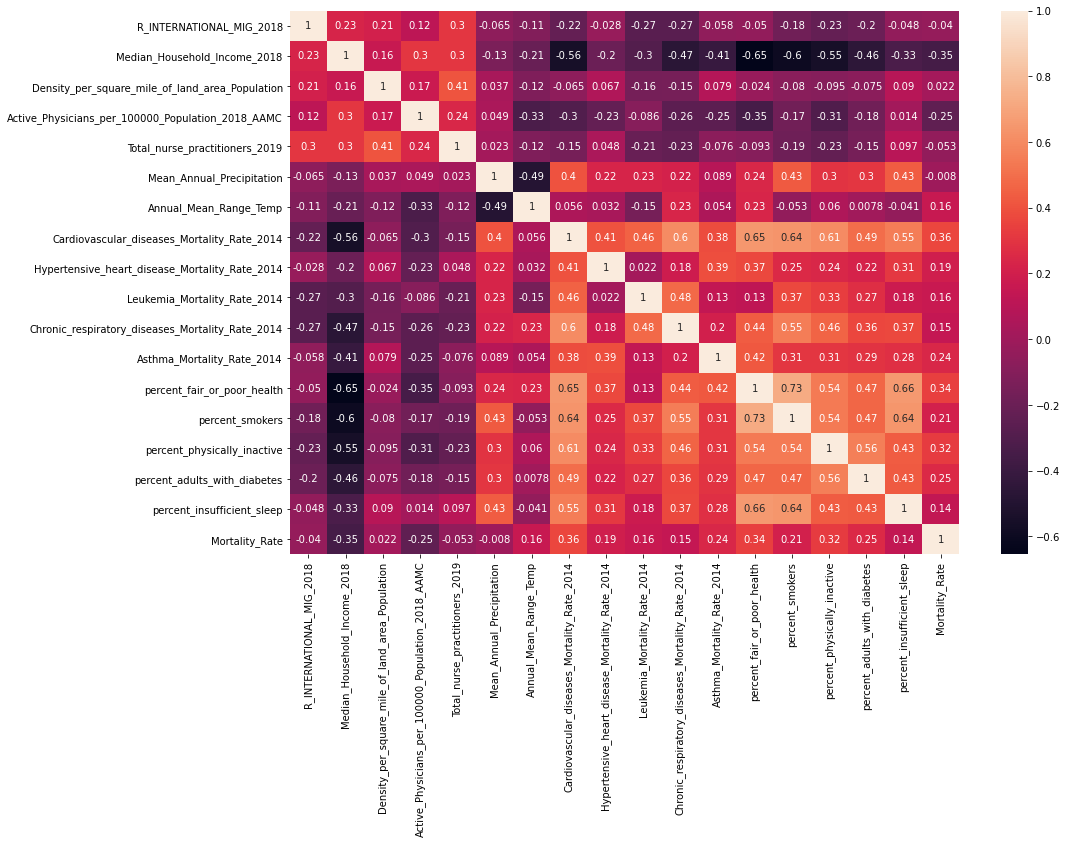

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
sns.heatmap(df.corr(), annot=True);  # Pair-wise correlation heatmap

## 3.3 Defining Training Features & Labels

In [10]:
train_features = df.iloc[:,:-1]
train_labels = df.iloc[:,df.columns.get_loc("Mortality_Rate")]

# 4. Deep Learning Model

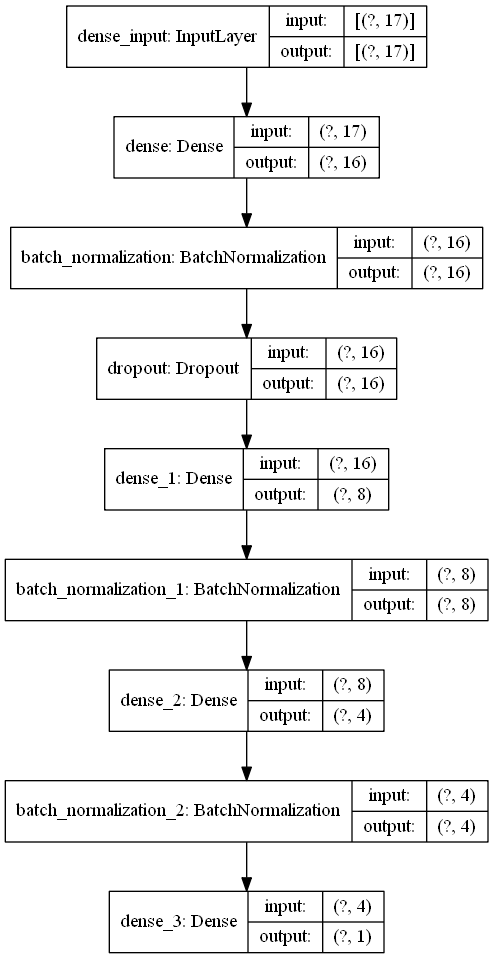

In [3]:
# Clearing model session
K.clear_session()

# Defining a custom loss function
# def RMSE(y_true, y_pred):
#     return tf.sqrt(tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_true, y_pred),2.0)),tf.cast(tf.size(y_true), tf.float32)))

# Specifying time to change the name of the model and further filter out them on tensorboard
# Name = 'COVID-19_Mortality_Neural_Network-{}'.format(int(time.time()))

# Defining a callback for early stopping on validation loss and one for Tensorboard
EarlyStopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min')
# Tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

# Creating model
model = Sequential()
# The initial wights are random numbers between 0 and 1, uniformly distributed.
model.add(Dense(16, input_dim=17, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

# Plotting graph
plot_model(model, to_file='Feed Forward Neural Network.png', show_shapes=True, rankdir='TB')

In [11]:
# Craeting a learning rate schedule
# lr_schedule = ExponentialDecay(initial_learning_rate=0.01, decay_steps=3133/32, decay_rate=0.96)
# optimizer = Adam(learning_rate=lr_schedule)

# Compiling model
optimizer = Adam(learning_rate=0.002)
model.compile(loss=['mse'], optimizer=optimizer)
# model.compile(loss=RMSE, optimizer=optimizer)  # Training With custom loss function

# Summarizing layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                288       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
batch_normalization_2 (Batch (None, 4)                 1

In [776]:
# Fitting the model
history = model.fit(train_features, train_labels, epochs=200, validation_split = 0.2, callbacks=[EarlyStopper])
# history = model.fit(train_features, train_labels, epochs=200, validation_split = 0.2, callbacks=[EarlyStopper, Tensorboard])

Epoch 1/200
79/79 [==============================] - 0s 4ms/step - loss: 50962.5273 - val_loss: 50203.1328
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 50566.1445 - val_loss: 49854.6211
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 49969.9766 - val_loss: 49279.7773
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 49113.0664 - val_loss: 49027.6172
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 48066.7930 - val_loss: 46908.3867
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 46780.1133 - val_loss: 45270.8164
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 45336.1250 - val_loss: 44774.8516
Epoch 8/200
79/79 [==============================] - 0s 3ms/step - loss: 43764.1719 - val_loss: 43915.9453
Epoch 9/200
79/79 [==============================] - 0s 3ms/step - loss: 42044.0977 - val_loss: 43850.5820
Epoch 10/200
79/79 [=================

In [777]:
pred = model.predict(train_features)

In [778]:
pred[0:10]  # First 10 predictions

array([[184.34564],
       [164.73715],
       [247.33003],
       [264.13657],
       [189.0134 ],
       [352.84628],
       [263.5845 ],
       [208.31482],
       [282.28818],
       [195.2279 ]], dtype=float32)

## 4.1 Loss Displaying

In [31]:
from matplotlib.pyplot import figure

def plot_loss(history):
  figure(figsize=(9, 5))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend(fontsize='small')

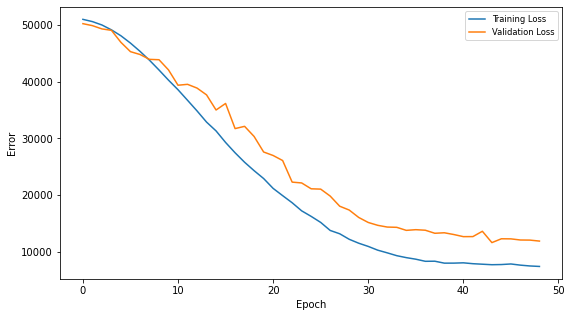

In [780]:
plot_loss(history)

## 4.2 Model Evaluation

In [781]:
print("Mean Absolute Error (MAE):", np.round(mean_absolute_error(df['Mortality_Rate'], pred),3),
      "\nMean Squared Error (MSE):", np.round(mean_squared_error(df['Mortality_Rate'], pred),3),
      "\nRoot Mean Squared Error (RMSE):", np.round(np.sqrt(mean_squared_error(df['Mortality_Rate'], pred)),3),
      "\nR-Squared:", np.round(r2_score(df['Mortality_Rate'], pred),3))

Mean Absolute Error (MAE): 62.795 
Mean Squared Error (MSE): 7615.847 
Root Mean Squared Error (RMSE): 87.269 
R-Squared: 0.406


In [782]:
# Coefficients
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(17, 16) dtype=float32, numpy=
array([[-0.08983431,  0.05896791, -0.18408287,  0.03697844,  0.00080419,
         0.01844494, -0.23664188,  0.07335785,  0.02423937, -0.04371552,
        -0.07739551,  0.00769744,  0.05917102, -0.3571665 ,  0.03537757,
        -0.00257151],
       [-0.1572999 , -0.21143474,  0.21358894, -0.2095378 , -0.05489152,
        -0.08095216, -0.23609985, -0.06225964,  0.08471181, -0.2601601 ,
        -0.21901256, -0.13415083, -0.11559121,  0.01707683,  0.01432781,
        -0.17158356],
       [ 0.02923713, -0.07787865, -0.7677413 , -0.24285088,  0.00093457,
         0.2515348 , -0.05101226, -0.15627378, -0.07251954, -0.01344875,
         0.07476577,  0.10606124, -0.3708662 , -0.02904061,  0.00563717,
        -0.02818692],
       [-0.03702464, -0.06115082, -0.0641194 , -0.6284788 ,  0.15764807,
         0.07816647,  0.15278623, -0.00453907, -0.57109153, -0.1294087 ,
        -0.23160377, -0.15318808, -0.1192396 ,  0.14117134, -0.2

In [783]:
# Intercepts
model.layers[0].weights[1]

<tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
array([-0.4810057 , -0.06744069, -0.11258493,  0.10392561, -0.49619105,
       -0.24572875, -0.5144094 ,  0.01927173, -0.37641996, -0.5373438 ,
       -0.060755  , -0.38848248, -0.4582222 , -0.45089445, -0.14897501,
       -0.48097584], dtype=float32)>

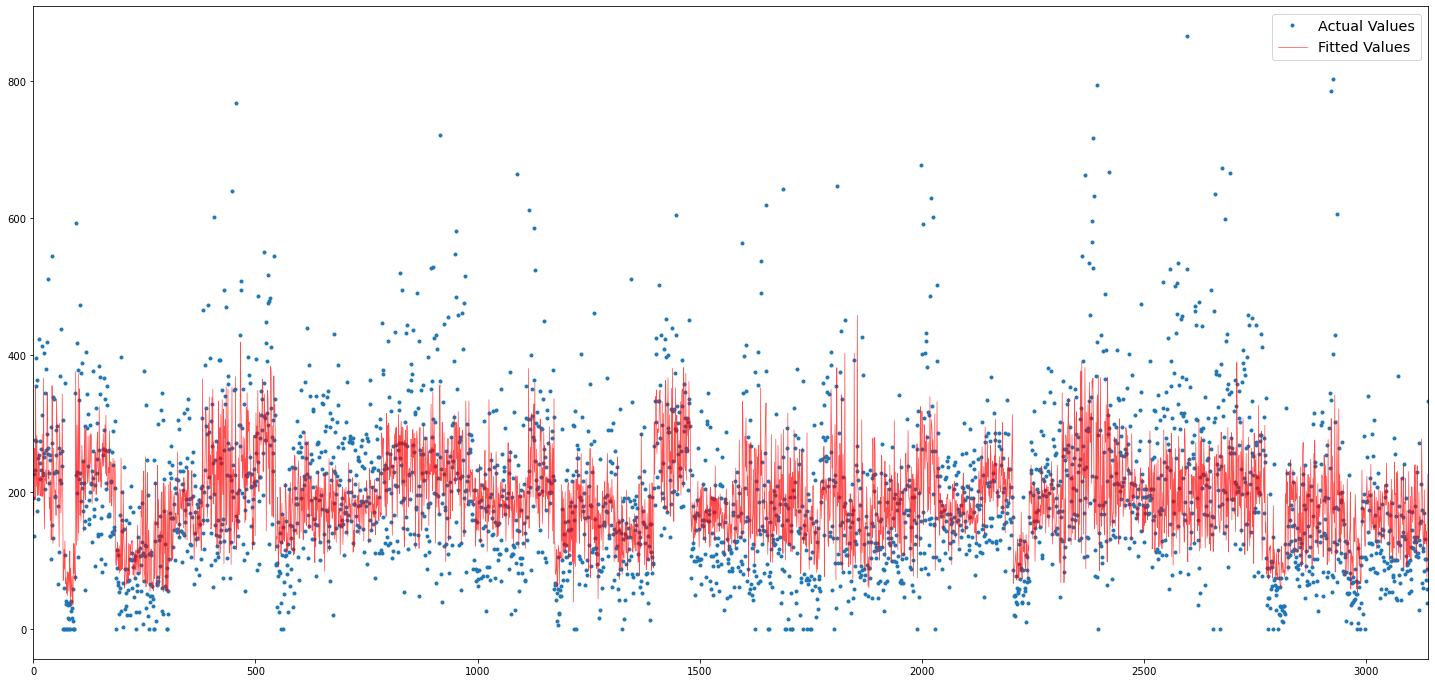

In [784]:
x=np.linspace(0,3140,3133)
figure(figsize=(25, 12))
plt.autoscale(enable=True, axis='x', tight=True)
plt.plot(x,train_labels,'.')
plt.plot(x,pred,'r', lw=0.7, alpha=0.7)
plt.legend(['Actual Values','Fitted Values'], fontsize='x-large');

# 5. Saving Model

In [785]:
model.save('Feed_Forward_Neural_Network.h5')

# 6. Loading Model

In [28]:
from keras.models import load_model

In [29]:
new_model = load_model('Feed_Forward_Neural_Network.h5')

In [30]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                288       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
batch_normalization_2 (Batch (None, 4)                 1